<a href="https://colab.research.google.com/github/2yLee/DeepLearning-study/blob/main/DeepLearningFromScratch/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

오차제곱합(sum of squares for error)

In [ ]:
def sum_squares_error(y, t):
  return 0.5*np.sum((y-t)**2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #예측
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 label
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

크로스 엔트로피 오차(cross entropy error)

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7 # -inf 방지
  return -np.sum(t * np.log( y + delta ))
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

MNIST 데이터셋 가져오기

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
y_train = to_categorical(y_train)
x_test = x_test.reshape((10000, 28*28))
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]
y_batch

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

배치용 크로스 엔트로피 오차

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log( y+1e-7)) / batch_size

수치미분

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / 2*h

In [ ]:
def function1(x):
  return 0.01*x**2 + 0.1*x

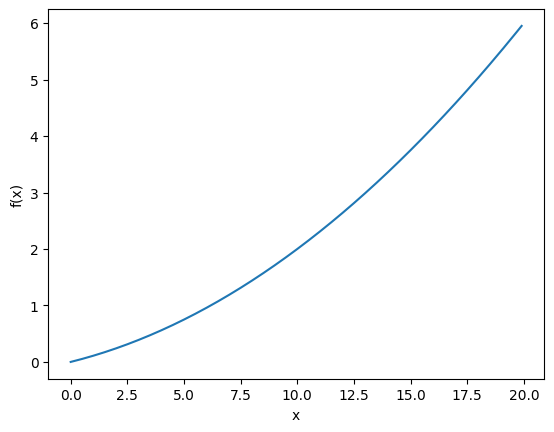

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, 20, 0.1)
y = function1(x)
plt.xlabel("x")
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function1, 5) #function1의 x=5에서의 기울기

1.9999999999908982e-09

gradient 구하는 함수 정의

In [ ]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

In [ ]:
def function2(x):
  return x[0]**2 + x[1]**2

Text(0.5, 0, 'f(X0, X1)')

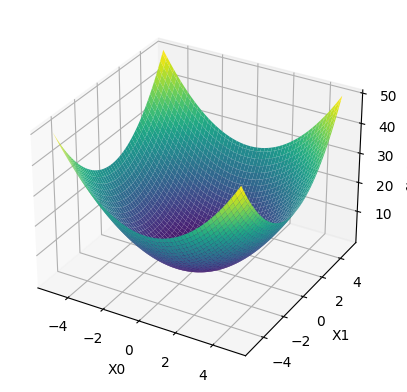

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
x0, x1 = np.meshgrid(x0, x1)
y = function2([x0, x1])

# 3D 플로팅
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0, x1, y, cmap='viridis')

# 라벨 및 타이틀 설정
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('f(X0, X1)')

In [ ]:
numerical_gradient(function2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
numerical_gradient(function2, np.array([2.0, 3.5]))

array([4., 7.])

In [ ]:
def function3(x):
  return 0.1*(x[0]**4) - 1.2*(x[0]**2) + x[0] + 3*(x[1]**2) - 3*x[1]
numerical_gradient(function3, np.array([1.0, 4.0]))

array([-1., 21.])

Text(0.5, 0, 'f(X0, X1)')

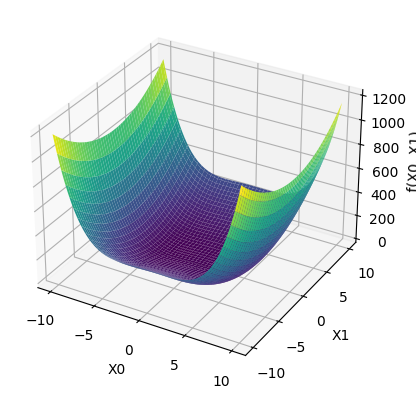

In [ ]:
x0 = np.linspace(-10, 10, 100)
x1 = np.linspace(-10, 10, 100)
x0, x1 = np.meshgrid(x0, x1)
y = function3([x0, x1])

# 3D 플로팅
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0, x1, y, cmap='viridis')

# 라벨 및 타이틀 설정
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('f(X0, X1)')

경사 하강법

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function2, init_x, lr = 0.1, step_num = 100)


array([-6.11110793e-10,  8.14814391e-10])

경사하강법을 100번 반복하는 동안 x의 좌표가 [-3, 4]에서 최소점인 [0,0]으로 가는 과정 시각화

In [ ]:
init_x = np.array([-3.0, 4.0])
def historical_gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  hist = [x]
  for i in range(step_num):
    grad = numerical_gradient(f, x)

    x -= lr * grad
    hist.append(list(x))

  return hist
hist = historical_gradient_descent(function2, init_x, lr = 0.01, step_num = 100)


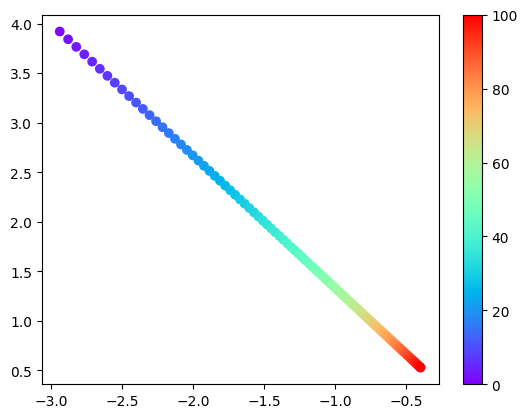

In [ ]:
hist = np.array(hist)
colors = np.arange(101)

plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()

function3에 대해서도 시각화

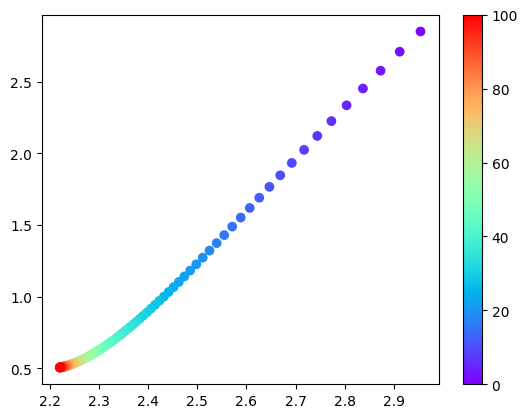

In [ ]:
init_x = np.array([3.0, 3.0])
hist = historical_gradient_descent(function3, init_x, lr = 0.01, step_num = 100)
hist = np.array(hist)
colors = np.arange(101)

plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()

In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = sum(exp_a)
  y = exp_a / sum_exp_a

  return y

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [ ]:
net = simpleNet()
net_W = net.W
net_W

array([[ 0.03945468, -0.3297504 , -0.38648658],
       [-0.75110268,  3.1494918 ,  1.56465683]])

In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[-0.65231961  2.63669238  1.1762992 ]
1


In [ ]:
t = np.array([0, 0, 1])
net.loss(x,t)

1.698965069167976

In [ ]:
def loss_f(W):
  return net.loss(x, t)

dW = numerical_gradient(loss_f, net_W)
dW

array([[ 0.01762546,  0.47265072, -0.49027618],
       [ 0.0264382 ,  0.70897607, -0.73541427]])

In [ ]:
np.random.randn(2, 3)

array([[ 0.33868233, -0.78542059,  0.50292704],
       [ 0.36049005, -2.15235035,  0.96560055]])

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    t = np.argmax(t, axis = 1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
t_train = to_categorical(t_train)
x_test = x_test.reshape((10000, 28*28))
t_test = to_categorical(t_test)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


미니배치 학습

In [ ]:
train_loss_list = []

iters_num = 50
train_size = x_train.shape[0]
batch_size = 10
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

for i in range(iters_num):

  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # 매개변수 갱신

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)


<ipython-input-43-7a0cfdad517b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-x))


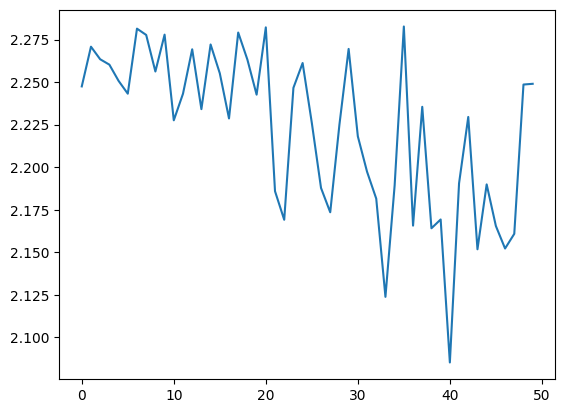

In [ ]:
plt.plot(train_loss_list)

시험 데이터로 평가하기

In [ ]:
iters_num = 50
train_size = x_train.shape[0]
batch_size = 10
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # 매개변수 갱신

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f'train acc, test acc : {train_acc}, {test_acc}')

<ipython-input-43-7a0cfdad517b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-x))


train acc, test acc : 0.29051666666666665, 0.2893


In [ ]:
test_acc_list

[0.2893]